<a href="https://colab.research.google.com/github/yurifillippo/datascience/blob/master/An%C3%A1lise_de_vendas_hist%C3%B3ricas_de_supermercados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de vendas históricas de supermercados**

![alt text](https://static-labs.ebanx.com/6/2020/01/shutterstock_590873999-800x400.jpg)

O conjunto de dados foi retirados de uma rede de supermercados com filiais em 3 cidades diferentes do País de Myanmar, localizado no continente Asiático,identificaremos qual publico mais realiza compras, quais as médias de valores entre outros insigths.

Fonte de dados: https://www.kaggle.com/aungpyaeap/supermarket-sales/download

# **Importação do Dataset e visualização da distribuição dos dados**

In [0]:
#Importando Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import seaborn as sns

In [0]:
#Criando DataFrame
#df = pd.read_csv(io.BytesIO(n['supermarket_sales.csv']))
df = pd.read_csv('/content/drive/My Drive/DataSets/supermarket_sales.csv')

In [9]:
print('Número de variáveis: {}'.format(df.shape[1]))
print('Número de entradas: {}'.format(df.shape[0]));

Número de variáveis: 17
Número de entradas: 1000


In [10]:
#Visualizando primeiras entradas
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [0]:
#Alterar nomes de colunas
df = df.rename(columns={"Customer type":"Customer_type", "Product line":"Product_line"})

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

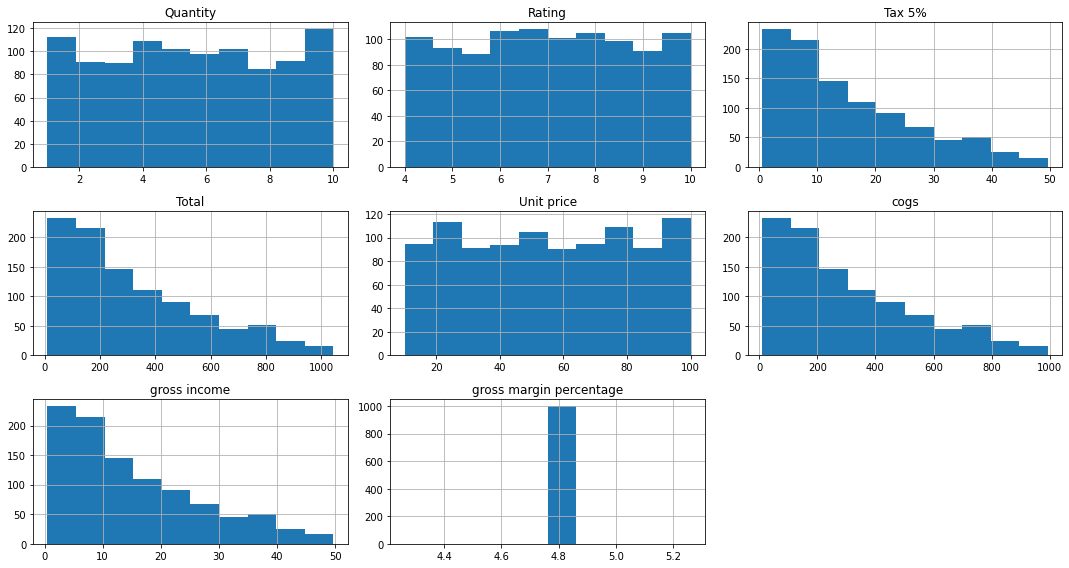

In [12]:
#Verificar distribuição dos dados
df.hist(figsize=(15,8))

plt.tight_layout()


# **Dicionário de Variáveis**


* **Invoice ID** - Número de identificação da fatura gerada

* **Branch** - Ramo do supercentro (estão disponíveis 3 ramos identificados por A, B e C)

* **City** - Localização dos supercentros

* **Customer type** - Tipo de clientes, registrados por Membros para clientes que usam cartão de membro e Normal para sem cartão de membro

* **Gender** - Tipo de cliente do sexo

* **Product line** - Grupos gerais de categorização de itens

* **Unit price** - Preço de cada produto em $

* **Quantity** - Número de produtos comprados pelo cliente

* **Tax 5%** - Taxa de imposto de 5% para a compra do cliente

* **Total** - Preço total incluindo impostos

* **Date** - Data da compra

* **Time** - Tempo de compra

* **Payment** - Pagamento usado pelo cliente para compra

* **cogs** - Custo de bens vendidos

* **gross margin percentage** - Percentual da margem bruta

* **gross income** - Renda bruta

* **Rating** - Classificação de estratificação do cliente em sua experiência geral de compra (em uma escala de 1 a 10)

# **Extração dos Insigths:**

### **City:**

* City X Customer type

* City X Gender

* City X Product line

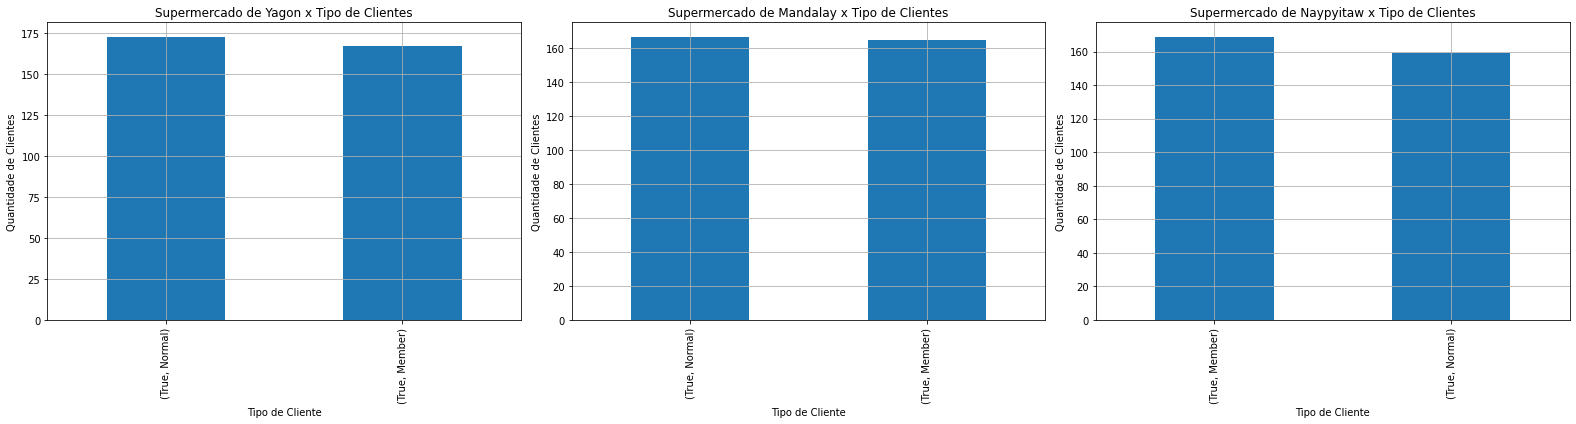

In [13]:
#City X Customer type

#Criando figure
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(22,6))

#Cruzando informações de tipos de clientes de acordo com as cidades dos supermercados

#Cidade de Yangon
df.groupby([df.City == 'Yangon']).Customer_type.value_counts()[2:4].plot(kind='bar', ax=ax1)
ax1.set_title("Supermercado de Yagon x Tipo de Clientes")
ax1.set_xlabel('Tipo de Cliente')
ax1.set_ylabel('Quantidade de Clientes')
ax1.grid(True)

#Cidade de Mandalay
df.groupby([df.City == 'Mandalay']).Customer_type.value_counts()[2:4].plot(kind='bar', ax=ax2)
ax2.set_title("Supermercado de Mandalay x Tipo de Clientes")
ax2.set_xlabel('Tipo de Cliente')
ax2.set_ylabel('Quantidade de Clientes')
ax2.grid(True)

#Cidade de Mandalay
df.groupby([df.City == 'Naypyitaw']).Customer_type.value_counts()[2:4].plot(kind='bar', ax=ax3)
ax3.set_title('Supermercado de Naypyitaw x Tipo de Clientes')
ax3.set_xlabel('Tipo de Cliente')
ax3.set_ylabel('Quantidade de Clientes')
ax3.grid(True)

plt.tight_layout();

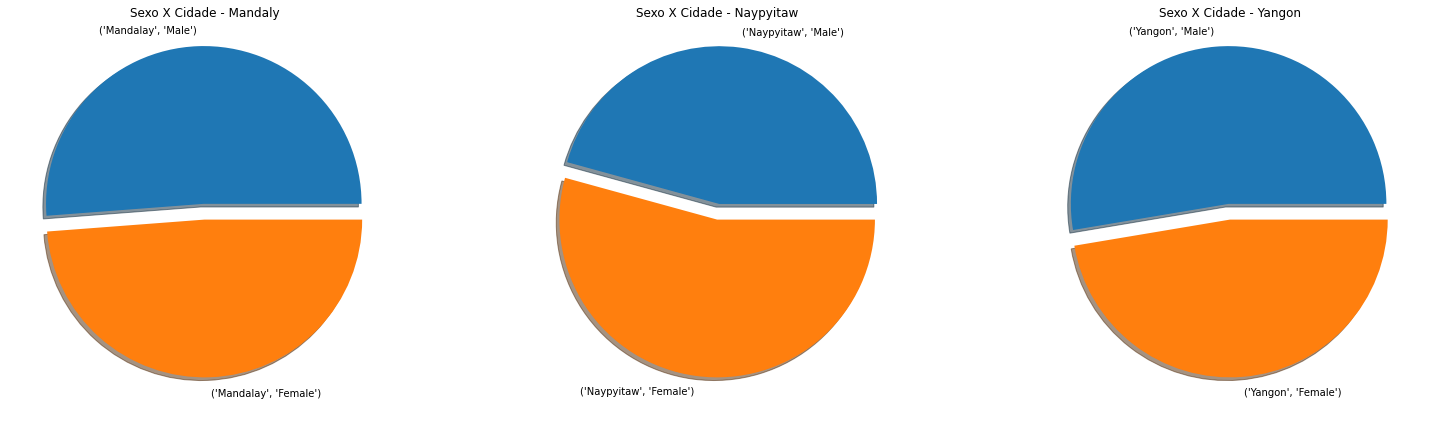

In [14]:
#City X Gender

#Criando dicionário mandaly
mandaly_gender = dict(df.groupby(['City']).Gender.value_counts()[:2])
# preparar dados para o pie chart
labels1 = mandaly_gender.keys()
sizes1 = mandaly_gender.values()
explode1 = (0.1, 0)

#Criando dicionário naypyitaw
naypyitaw_gender = dict(df.groupby(['City']).Gender.value_counts()[2:4])
# preparar dados para o pie chart
labels2 = sorted(naypyitaw_gender.keys(), reverse=True)
sizes2 = sorted(naypyitaw_gender.values())
explode2 = (0.1, 0)

#Criando dicionário yangon
yangon_gender = dict(df.groupby(['City']).Gender.value_counts()[4:6])
# preparar dados para o pie chart
labels3 = yangon_gender.keys()
sizes3 = yangon_gender.values()
explode3 = (0.1, 0)

#Plotar figure
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(22,6))

# plotar o gráfico de pizza mandaly
ax1.pie(sizes1, labels=labels1, explode=explode1, shadow=True)
ax1.set_title('Sexo X Cidade - Mandaly')

# plotar o gráfico de pizza naypyitaw
ax2.pie(sizes2, labels=labels2, explode=explode2, shadow=True)
ax2.set_title('Sexo X Cidade - Naypyitaw')

# plotar o gráfico de pizza yangon
ax3.pie(sizes3, labels=labels3, explode=explode3, shadow=True)
ax3.set_title('Sexo X Cidade - Yangon')

plt.tight_layout();

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

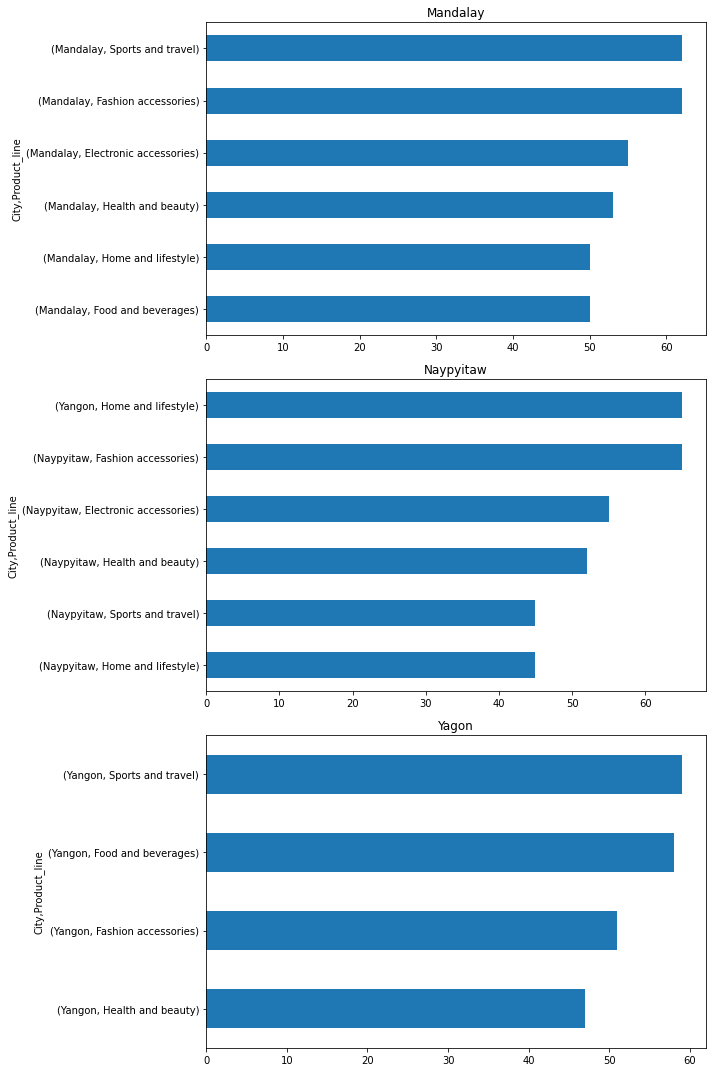

In [15]:
#City X Product Line
#Plotar figure
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10,15));

#Gráfico de Mandaly
df.groupby(["City"]).Product_line.value_counts()[:6].sort_values().plot(kind='barh', ax=ax1)
ax1.set_title('Mandalay')

#Gráfico de Mandaly
df.groupby(["City"]).Product_line.value_counts()[7:13].sort_values().plot(kind='barh', ax=ax2)
ax2.set_title('Naypyitaw')

#Gráfico de Mandaly
df.groupby(['City']).Product_line.value_counts()[14:].sort_values().plot(kind='barh', ax=ax3)
ax3.set_title('Yagon')


plt.tight_layout()

### **Customer Type:**

* Customer type X Preço Total

* Customer type X Gender

* Customer type X Product Line

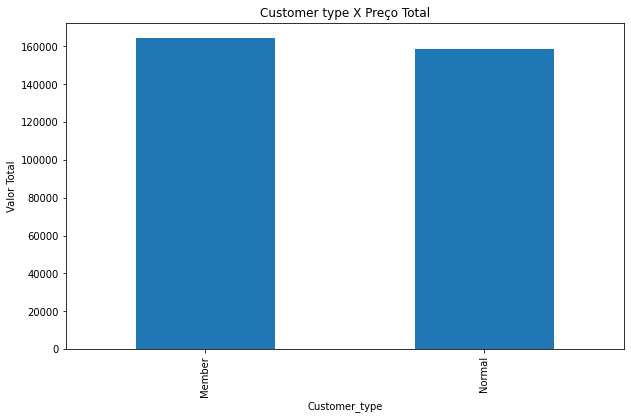

In [16]:
#Customer type X Preço Total
fig, ax = plt.subplots(figsize=(10,6))
df.groupby(['Customer_type']).Total.sum().plot(kind='bar')
ax.set_title('Customer type X Preço Total')
ax.set_ylabel('Valor Total');

In [17]:
#Instalar pywaffle
!pip install pywaffle -q

     |████████████████████████████████| 532kB 2.8MB/s 


In [0]:
#Importar Waffle
from pywaffle import Waffle

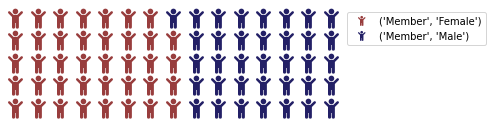

In [19]:
#Customer type X Gender

#Variável para Feminino
Member = df.groupby(['Customer_type']).Gender.value_counts()[:2].to_dict()
#Variável para Masculino
Normal = df.groupby(['Customer_type']).Gender.value_counts()[2:4].to_dict()

#Plotar gráfico de Membros
fig = plt.figure(FigureClass=Waffle, rows=5, columns= 15, values=Member, colors=("#983D3D", "#232066"), icons='child', icon_size=20, legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
                icon_legend=True)

fig.set_tight_layout(False)
plt.show();

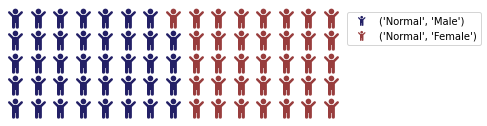

In [20]:
#Plotar gráfico de Normal
fig = plt.figure(FigureClass=Waffle, rows=5, columns=15, values=Normal, colors=("#232066", "#983D3D"), icons='child', icon_size=20, legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)}, icon_legend=True)
fig.set_tight_layout(False)
plt.show();

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

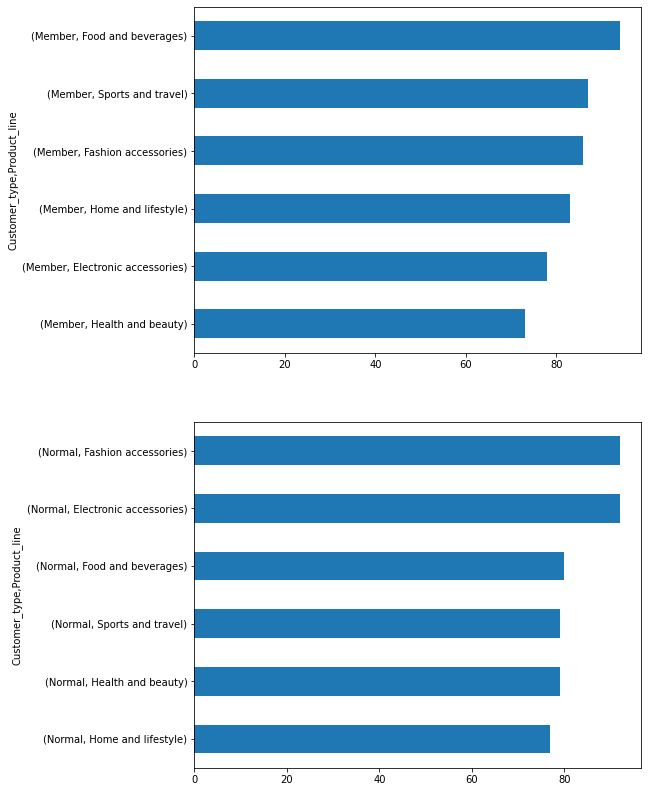

In [21]:
#Customer type X Product Line
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8,14))
df.groupby(['Customer_type']).Product_line.value_counts()[:6].sort_values().plot(kind='barh', ax=ax1)
df.groupby(['Customer_type']).Product_line.value_counts()[6:].sort_values().plot(kind='barh', ax=ax2);



### **Gender:**

* Gender X Quantity

* Gender X Payment


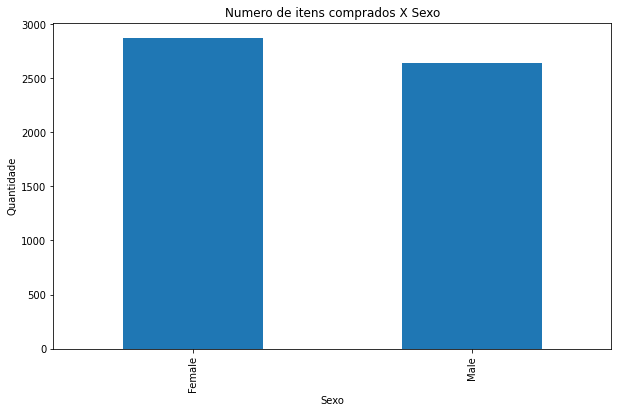

In [22]:
#Gender X Quantity
#Plotar figure
fig, ax = plt.subplots(figsize=(10,6))

#Plotar gráfico
df.groupby('Gender').Quantity.sum().plot(kind='bar', ax=ax)
ax.set_title('Numero de itens comprados X Sexo')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Sexo');

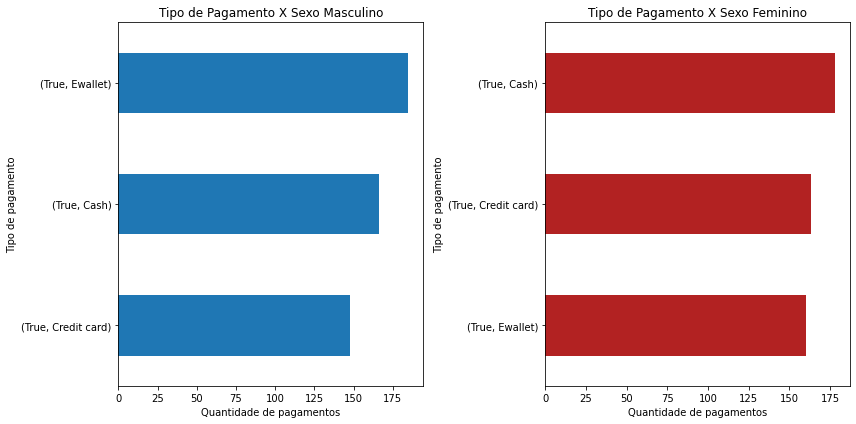

In [23]:
#Gender X Payment

#Plotar Figure
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols=2, figsize=(12,6))

#Plotar gráfico para sexo Masculino
df.groupby([df.Gender == 'Male']).Payment.value_counts()[3:].sort_values().plot(kind='barh', ax=ax1)
ax1.set_title('Tipo de Pagamento X Sexo Masculino')
ax1.set_ylabel('Tipo de pagamento')
ax1.set_xlabel('Quantidade de pagamentos')

#Plotar gráfico para sexo MFeminino
df.groupby([df.Gender == "Female"]).Payment.value_counts()[3:].sort_values().plot(kind='barh', ax=ax2, color='#B22222')
ax2.set_title('Tipo de Pagamento X Sexo Feminino')
ax2.set_ylabel('Tipo de pagamento')
ax2.set_xlabel('Quantidade de pagamentos')


plt.tight_layout();

# Conclusões

Em nosso dataset temos um total de 17 variáveis e 1000 entradas, a distribuição dos dados não apresentavam valores outliers.

A unidade da cidade de **Mandaly** apresenta números bem próximos de clientes normais e membros associados, uma maior concentração de clientes do sexo masculino e as linhas de "Sports and travel" e "Fashion accessories" liderando o ranking de vendas.


Já na cidade de **Naypyitaw** há uma concentração maior de clientes membros associados, porém com uma diferença de aproximadamente 10 clientes para os normais, uma maioria de clientes do sexo Feminino e melhor numero de vendas das linhas de "Home and lifestyle" e "Fashion accessories".


Já a unidade de **Yagon** é a que possui mais clientes dentre todas as filiais uma concentração maior de clientes normais, o sexo masculino novamente prevalesce e maior venda em produtos das linhas de "Sports and travel" e "Food and beverages".

![alt text](https://supermercadorr.com.br/wp-content/uploads/2016/12/Hiper-super-ou-mercado.jpg)

Unificando o faturamento das 3 unidades temos valores bem distribuidos entre os tipos de clientes, porém, prevalescendo o maior volume de vendas entre os clientes membros, entre os membros temos um maior concentração do sexo masculino, com maiores vendas em "Food and beverages" e "Sports and travel".

O clientes normais tem maioria do sexo feminino, com maiores vendas em "Fashion accessories" e "Eletronic acessories".

Observando as quantidades comprados em todas as unidades, o sexo feminino realiza a compra de maior número de itens, realizando a maioria dos pagamentos em dinheiro, já o sexo masculino opta por utilizar e-wallet, que nada mais é do que uma carteira digital.
![alt text](https://ogimg.infoglobo.com.br/celina/23751884-40c-c03/FT1086A/652/xfinal.jpg.pagespeed.ic.KWi34-2H5Q.jpg)
